In [1]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = main(one_hot=True, dataV=pd.read_csv("data/BST_V2toV9.csv", header=0, sep=";"), retained=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 9 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 34 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 1 minutes and 47 seconds


In [3]:
data.head()

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  1                                                                   
1                                                  0                                                                   
2                                                  0                                                                   
3                                                  0                                                                   
4                                                  0                                                                   

   Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                2.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                                                0.0                                                                    

   Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  0                                                                     
1                                                  0                                                                     
2                                                  1                                                                     
3                                                  0                                                                     
4                                                  0                                                                     

   Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  0                                                                    
1                                                  0                                                                    
2                                                  1                                                                    
3                                                  0                                                                    
4                                                  0                                                                    

   outcome  (Q1- Your sex?_A man,)  (Q1- Your sex?_A woman,)  \
0        2                       1                         0   
1        1                       1                         0   
2        3                       0                         1   
3        0                       1                         0   
4        2                       1                         0   

   (Q1- Your sex?_nan,)  (Q2- How old are you?_18 - 30,)  \
0                     0                                0   
1                     0                                1   
2                     0                                0   
3                     0                                0   
4                     0                                0   

   (Q2- How old are you?_30 - 39,)  (Q2- How old are you?_40 - 44,)  \
0                                1                                0   
1                                0                                0   
2                                0                                0   
3                                1                               

In [4]:
data.describe()

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                   
mean                                            0.183302                                                                   
std                                             0.452550                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37680.000000                                                                    
mean                                            0.243471                                                                    
std                                             0.558963                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                                                                    
max                                             9.000000                                                                    

       Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                     
mean                                            0.192431                                                                     
std                                             0.483806                                                                     
min                                             0.000000                                                                     
25%                                             0.000000                                                                     
50%                                             0.000000                                                                     
75%                                             0.000000                                                                     
max                                             9.000000                                                                     

       Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                    
mean                                            0.201799                                                                    
std                                             0.554549                                                                    
min                                             0.000000                                                                    
25% 

In [5]:
not_cat = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",
    "outcome"
]

# catagorical columns (everything other than the non_categorical columns)
categorical_cols = [col for col in data.columns if col not in not_cat]

In [6]:
# df_features = data.drop(categorical_cols, axis=1)
df_features = data.drop("outcome", axis=1)
df_features.columns = [str(col) for col in df_features.columns]

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled ,columns=df_features.columns)

In [7]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(429, 37681)

In [8]:
# Check for non-finite values
if not np.all(np.isfinite(df_transposed.values)):
    print("Data contains non-finite values.")
    print(df_transposed[~np.isfinite(df_transposed).all(axis=1)])
else:
    print("Data is finite.")

# Handle non-finite values (example: filling NaNs with the column mean)
df_transposed = df_transposed.apply(lambda x: x.fillna(x.mean()), axis=0)

# Verify again if all values are finite
if not np.all(np.isfinite(df_transposed.values)):
    raise ValueError("There are still non-finite values in the data.")
else:
    print("All values are now finite.")


Data contains non-finite values.
                                                       0         1      \
Q4- (7 to 12 years old) In each of the followin...  3.142522 -0.435583   

                                                       2         3      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       4         5      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       6         7      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       8         9      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       10        11     \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       12        13     \

In [9]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed , method='ward', metric='euclidean', optimal_ordering=True)

np.shape(linked)

(428, 4)

In [10]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size']) 
# c1 and c2 are the two clusters that are being joined
# distance is the distance between the two clusters
# size is the number of features in the cluster

df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')
df_linked[['count']] = 0

for i in range(1,len(df_linked)):
    df_linked.loc[i, 'count'] = df_linked.loc[i-1, 'count'] + df_linked.loc[i, 'size']

df_linked[0:35]

c1   c2    distance  size  count
0    28   18    0.000000     2      0
1    42  186   15.115188     2      2
2   247  259   23.768352     2      4
3   431  241   25.295407     3      7
4   297  302   25.956290     2      9
5   253  432   27.539147     4     13
6   312  433   27.785966     3     16
7   434  238   27.901252     5     21
8   250  436   28.547283     6     27
9   435  307   28.591013     4     31
10  437  262   28.896345     7     38
11  317  438   28.975295     5     43
12  439  244   29.551843     8     51
13  256  441   32.969231     9     60
14  217  223   34.934951     2     62
15  191  196   35.576730     2     64
16  232  443   37.109886     3     67
17  445  214   37.768024     4     71
18  229  446   38.279380     5     76
19  447  220   38.995764     6     82
20  226  448   39.241419     7     89
21  235  449   42.954680     8     97
22  440  444   50.611203     7    104
23  342  387   55.182975     2    106
24  442  451   64.573861    16    122
25  450  452   69.856798    10    132
26  453  322  102.257554    17    149
27  275  279  134.456087     2    151
28  251  260  150.004061     2    153
29  193  188  161.045539     2    155
30  187  192  162.884677     2    157
31  236  242  165.216142     2    159
32  243  237  165.760181     2    161
33  332  337  166.797838     2    163
34  194  189  172.575353     2    165

In [11]:
from scipy.cluster.hierarchy import inconsistent

incons = inconsistent(linked)
print(incons)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.51151876e+01 1.01859848e-07 1.00000000e+00 0.00000000e+00]
 [2.37683521e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 ...
 [7.60858054e+02 1.51369816e+02 3.00000000e+00 1.11544641e+00]
 [8.03953992e+02 2.52178200e+02 3.00000000e+00 6.52622360e-01]
 [9.56048295e+02 3.78910427e+02 3.00000000e+00 9.83120922e-01]]


In [12]:
# !pip install gap-stat
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(df_transposed, cluster_array=np.arange(1, 60))
print(f"Optimal number of clusters: {n_clusters}")


/Users/dilancroos/Documents/LPI/Study_Meterial/Internship/working_data/.sick/lib/python3.12/site-packages/gap_statistic/optimalK.py:290: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  centroids, labels = self.clusterer(
/Users/dilancroos/Documents/LPI/Study_Meterial/Internship/working_data/.sick/lib/python3.12/site-packages/gap_statistic/optimalK.py:290: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  centroids, labels = self.clusterer(
/Users/dilancroos/Documents/LPI/Study_Meterial/Internship/working_data/.sick/lib/python3.12/site-packages/gap_statistic/optimalK.py:290: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  centroids, labels = self.clusterer(


Optimal number of clusters: 58


In [13]:
# threshold for optimal number of clusters
threshold = 0

for i in range(1, len(df_linked)):
    if (df_linked.loc[i, 'count']) > n_clusters:
        threshold = df_linked.loc[i, 'distance']
        break

print(f"Threshold for optimal number of clusters: {threshold}")

Threshold for optimal number of clusters: 32.96923063441553


In [14]:
# number of clusters based on threshold

clusters = fcluster(linked, n_clusters, criterion='maxclust')
np.unique(clusters)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58], dtype=int32)

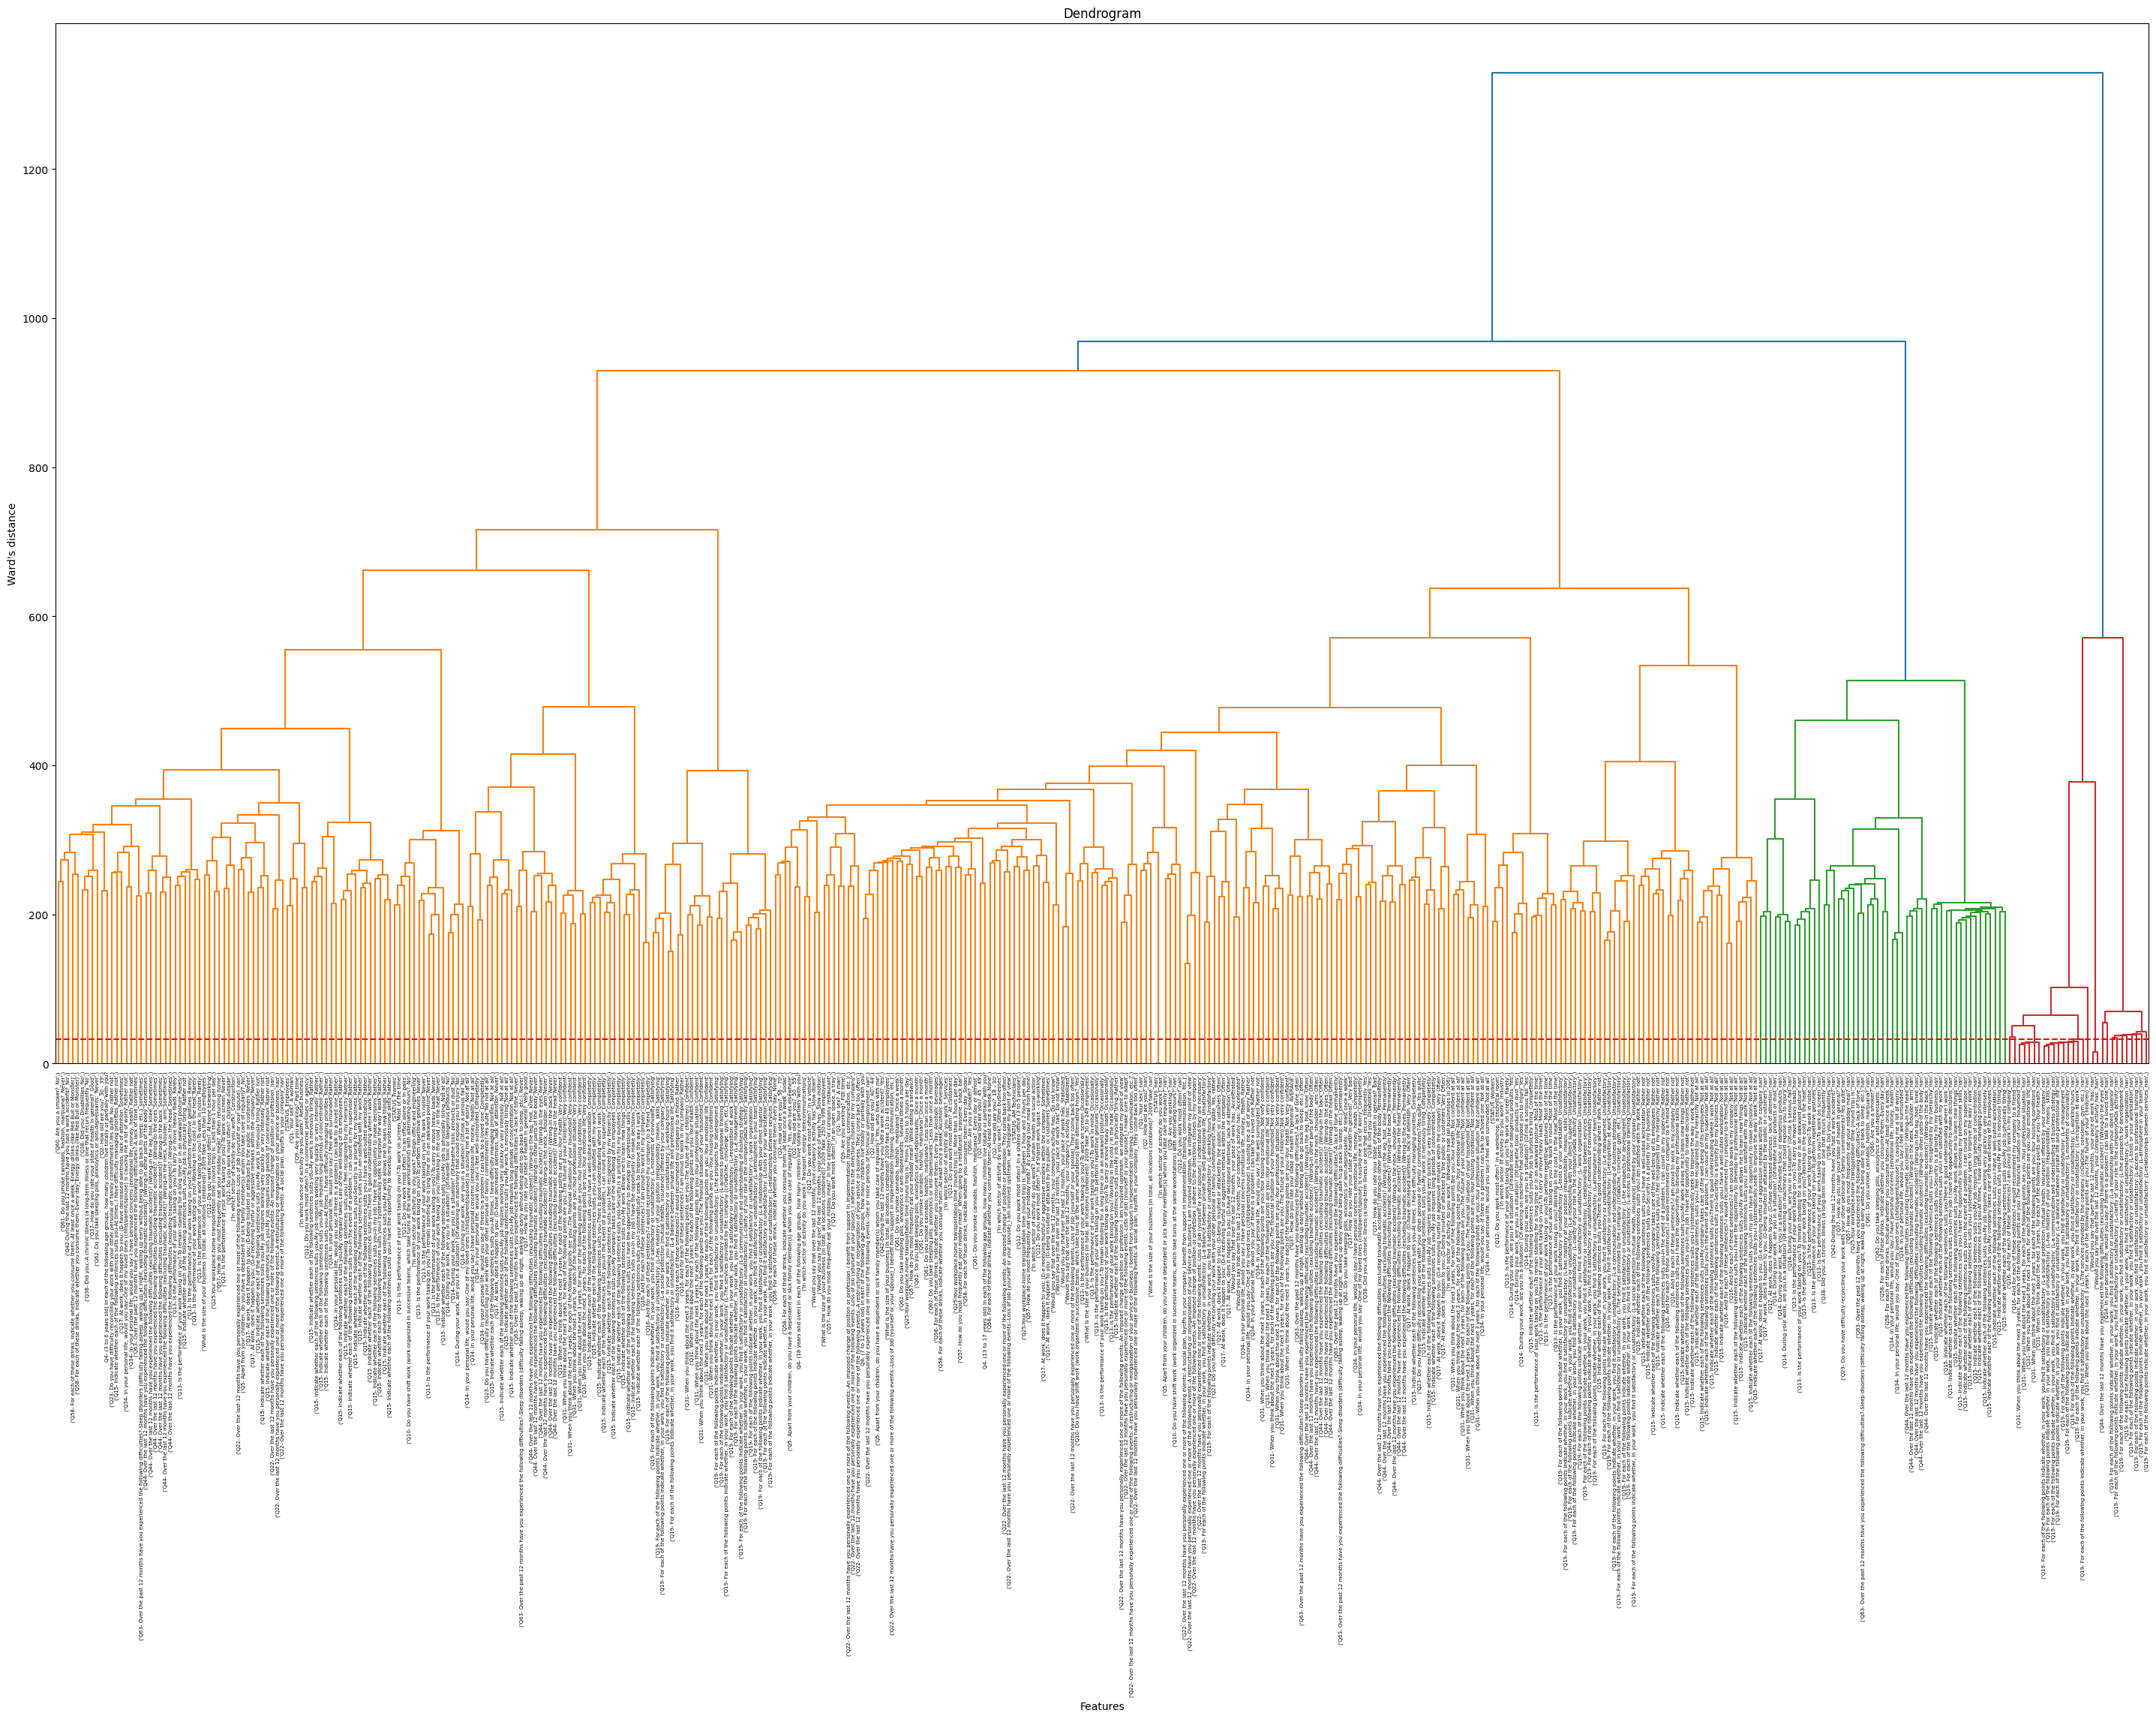

In [15]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(36, 18)) 
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(linked ,
            orientation='top', 
            labels=df_transposed.index,
            distance_sort='descending', 
            show_leaf_counts=True)
plt.axhline(y=threshold, color='r', linestyle='--')
# 45 degree angle for x axis labels
plt.xticks(rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel("Ward's distance")

plt.savefig('outputs/01_01_feat_cluster_29/dendrogram.png')

In [16]:
num_clusters = 56 # Adjust the number of clusters as needed (try 2, 3, 4, 8, 9 etc.)

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [17]:
df_features_cleaned = df_features.copy()

# Clean the column names by replacing spaces and special characters with underscores
df_features_cleaned.columns = [str(col).replace(' ', '_').replace('?', '').replace('-', '_').replace('(', '').replace(')', '') for col in df_features.columns]

# Find correlation between features and outcome
correlations = []
for col in df_features_cleaned.columns:
    corr = data['outcome'].corr(df_features_cleaned[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [18]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True) 
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

feature  cluster   corr  abs_corr
0  ("Would you say that over the last 12 months, ...        1  0.062     0.062
1  ('Would you say that over the last 12 months, ...        1  0.062     0.062
2  ('Q19- For each of the following points indica...        2  0.100     0.100
3  ('Q19- For each of the following points indica...        2  0.100     0.100
4  ('Q31- When you think about the next 3 years, ...        2  0.100     0.100
5  ('Q31- When you think about the next 3 years, ...        2  0.100     0.100
6  ('Q16- And for each of these sentences?-I woul...        2  0.099     0.099
7  ('Q16- And for each of these sentences?-I am p...        2  0.099     0.099
8  ('Q19- For each of the following points indica...        2  0.099     0.099
9  ('Q19- For each of the following points indica...        2  0.099     0.099

In [19]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist() 
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

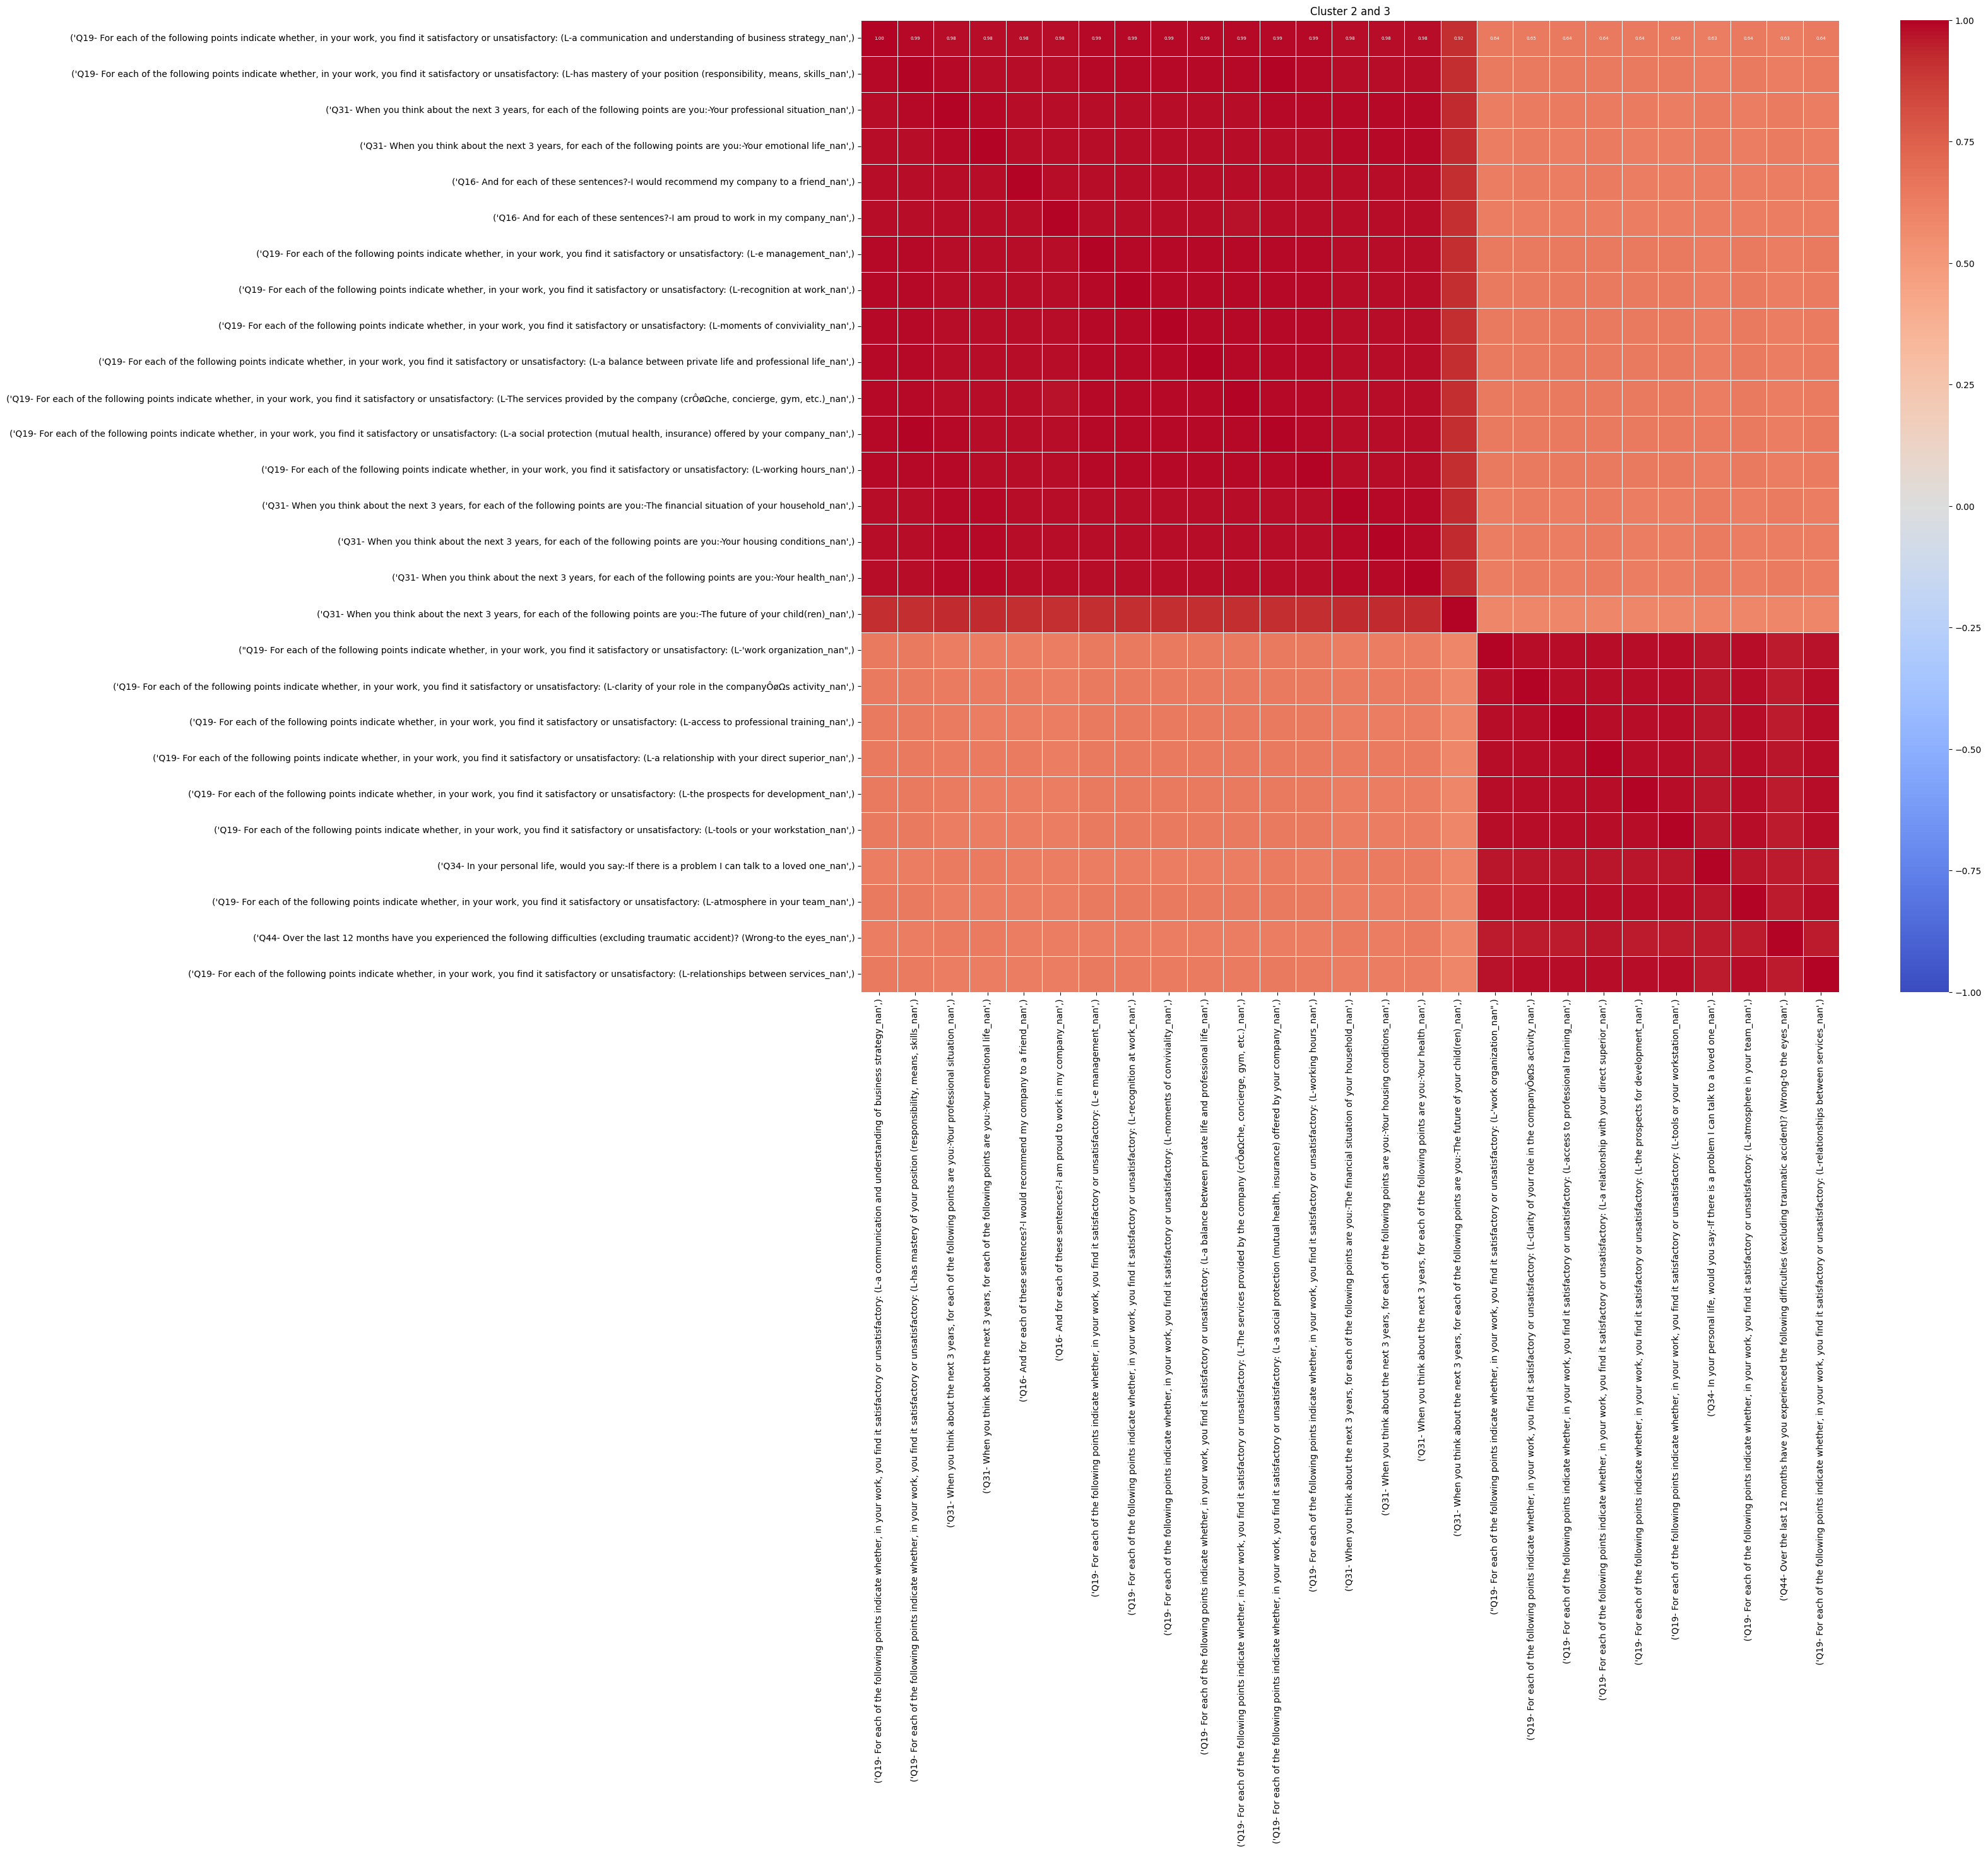

In [20]:
# Plot correlations for features in clusters 2 and 3
corr = df_features[np.append(c2_features ,c3_features)].corr()

# plot correlation matrix with correlation values in all cells
plt.figure(figsize=(25, 20)) 
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".2f",
            annot_kws={"size": 5}, 
            vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Cluster 2 and 3')


plt.savefig('outputs/01_01_feat_cluster_29/corr_cluster_2_3.png')

In [21]:
df_clusters.to_csv('outputs/01_01_feat_cluster_29/feature_clusters.csv', index=False, header=True, sep=';')

In [22]:
# print the features in each cluster

for i in range(1, num_clusters+1):
    print(f'Cluster {i}:')
    print(f"{df_clusters[df_clusters['cluster']==i]['feature'].values}, corr: {df_clusters[df_clusters['cluster']==i]['corr'].values}")
    print('\n')

Cluster 1:
['("Would you say that over the last 12 months, your company\'s activity has:_nan",)'
 "('Would you say that over the last 12 months, your pace of work has:_nan',)"], corr: [0.062 0.062]


Cluster 2:
["('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-a communication and understanding of business strategy_nan',)"
 "('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-has mastery of your position (responsibility, means, skills_nan',)"
 "('Q31- When you think about the next 3 years, for each of the following points are you:-Your professional situation_nan',)"
 "('Q31- When you think about the next 3 years, for each of the following points are you:-Your emotional life_nan',)"
 "('Q16- And for each of these sentences?-I would recommend my company to a friend_nan',)"
 "('Q16- And for each of these sentences?-I am proud to work in my company_nan',)